In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv(r'C:\Users\ehsan\Downloads\archive\glass_data.csv')

In [5]:
df.head() 

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('column_k',axis=1))
Scaled = scaler.transform(df.drop('column_k',axis=1))

In [8]:
scaledview = pd.DataFrame(Scaled,columns=df.columns[:-1])
scaledview.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Train Test Split
## Use train_test_split to split your data into a training set and a testing set.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Scaled,df['column_k'],
                                                    test_size=0.30)

In [11]:
import math
print(math .sqrt(len(y_train)))
print(len(y_train))

12.206555615733702
149


## Using KNN
## Import KNeighborsClassifier from scikit learn.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## Predictions and Evaluations

In [15]:
y_pre = knn.predict(X_test)


In [16]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [17]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        17
           2       0.74      0.92      0.82        25
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         2
           7       0.82      0.82      0.82        11

    accuracy                           0.77        65
   macro avg       0.57      0.48      0.47        65
weighted avg       0.74      0.77      0.72        65



In [18]:
confusion_matrix(y_test,y_pre)

array([[17,  0,  0,  0,  0,  0],
       [ 2, 23,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  1,  1],
       [ 0,  0,  1,  0,  0,  1],
       [ 0,  2,  0,  0,  0,  9]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pre)

0.7692307692307693

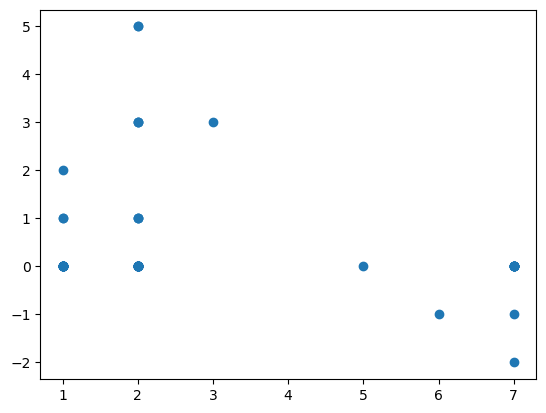

In [20]:
residuals = y_test - y_pre
residuals.mean()
plt.scatter(y_pre, residuals)

In [21]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

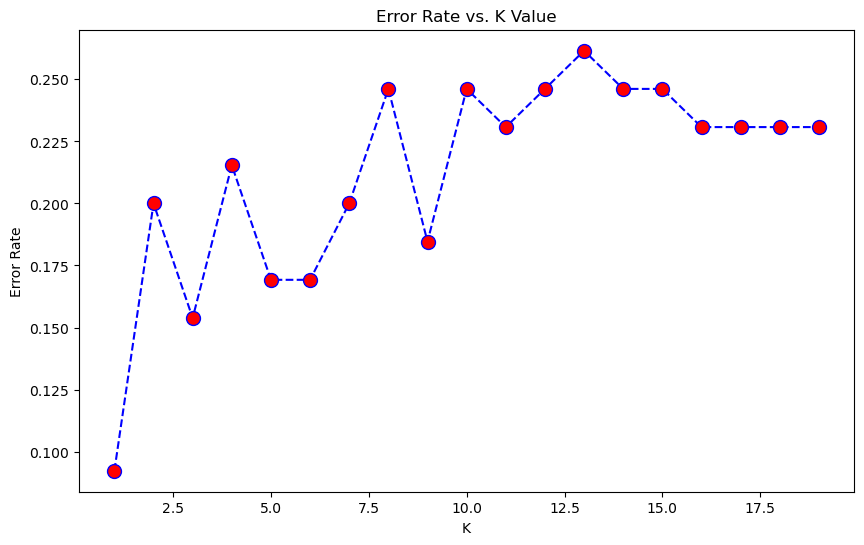

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')